+## Sklearn Tutorial
This Scikit Learn tutorial is based on [Karlijn Willems Tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python#)
* It takes you through the basics of Matplotlib, Machine Learning, kmeans, unsupervised learning and support vector machines (SVM)
* The dataset utilised is from the digits dataset from the sklearn library

In [1]:
# Import `datasets` from `sklearn`
from sklearn import datasets
# Load in the `digits` data
digits = datasets.load_digits()
# Print the `digits` data 
print(digits)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [2]:
#All keys available to access the data in digits
# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

# Print out the description of the `digits` data
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

## Quick overview of the data
Summary of the data
* Data type
* Isolating of data based on keys
* Making sense of the data

In [3]:
# import the numpy library
import numpy as np

# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print("Shape of the digits data is: {}".format(digits_data.shape))
print("\tThis means that there are {} samples and {} features\n".format(digits_data.shape[0],digits_data.shape[1]))

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print("Shape of the target data is: {}".format(digits_target.shape))
print("\tThis means that there are {} target values\n".format(digits_target.shape[0]))

# Print the number of unique labels
number_digits = len(np.unique(digits.target))
print("There are *{}* unique labels\n".format(number_digits))

# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print("Shape of the images: {}".format(digits_images.shape))
print("\tThis means that there are {} instances. These instances are {} by {} pixels big\n"
      .format(digits_images.shape[0], digits_images.shape[1], digits_images.shape[2]))

Shape of the digits data is: (1797, 64)
	This means that there are 1797 samples and 64 features

Shape of the target data is: (1797,)
	This means that there are 1797 target values

There are *10* unique labels

Shape of the images: (1797, 8, 8)
	This means that there are 1797 instances. These instances are 8 by 8 pixels big



In [4]:
# Checking if all array elements along a given axis are the same
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


## Visualising the data

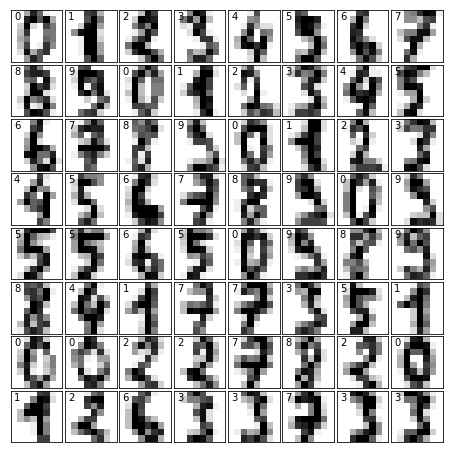

In [5]:
%matplotlib inline
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size (width = 6, height = 6) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 1, str(digits.target[i]))

# Show the plot
plt.show()

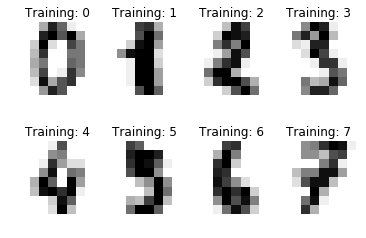

In [6]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

### Visualising the data with Principal Component Analysis (PCA)
* This is a dimensionality reduction technique. The idea in PCA is to find a linear combination of the 2 variables that contains the most information

In short, it’s a linear transformation method that yields the directions (principal components) that maximize the variance of the data. Remember that the variance indicates how far a set of data points lie apart. 

In [7]:
from sklearn.decomposition import RandomizedPCA,PCA
# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


[[ -1.26132127  21.27517402]
 [  7.98612068 -20.76745313]
 [  6.9973238   -9.9492355 ]
 ...
 [ 10.78264135  -6.98479083]
 [ -4.87589387  12.40551112]
 [ -0.37897785   6.34185397]]
[[ -1.25946667  21.27488299]
 [  7.95761222 -20.7686934 ]
 [  6.99192274  -9.95598857]
 ...
 [ 10.80128325  -6.96025806]
 [ -4.87210085  12.42395199]
 [ -0.34439105   6.36553899]]


In [8]:
#due to depreciation warning, here is the other version

# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2, svd_solver ="randomized")

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2, svd_solver ="full")

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946632  21.27488338]
 [  7.95760905 -20.7686921 ]
 [  6.99192401  -9.9559899 ]
 ...
 [ 10.80128452  -6.96025314]
 [ -4.87209783  12.42395129]
 [ -0.34438713   6.36554207]]
[[ -1.25946645  21.27488348]
 [  7.9576113  -20.76869896]
 [  6.99192297  -9.95598641]
 ...
 [ 10.8012837   -6.96025223]
 [ -4.87210009  12.42395362]
 [ -0.34438963   6.36554919]]


#### Scatter plot

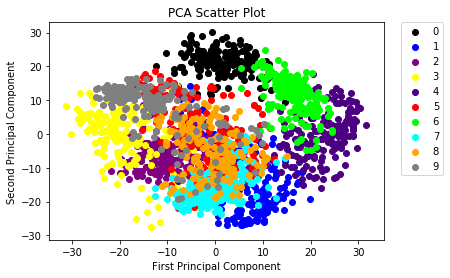

In [9]:
colors = ['black', 'blue', 'purple', 'yellow', 'indigo', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

## Preprocessing the Data

* In order to preprocess the data we use the sklearn scale() method to standardise the digits
* By doing this, we shift the distribution of each attribut to have a mean of zero and a standard deviation of one (unit variance)

In [10]:
# Import
from sklearn.preprocessing import scale

# Apply `scale()` to the `digits` data
data = scale(digits.data)
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### Spliting into training and test sets
* This can be done using the traditional train_test_split() method from sklearn library. 
* The split is normally 2/3 training and 1/3 testing (in this case, 3/4 and 1/4 split is used)
* Randomstate = 42 to ensure that the results can be reproduced

In [11]:
# Import `train_test_split`
# from sklearn.cross_validation import train_test_split

# Split the `digits` data into training and test sets
# X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [12]:
# Due to depreciation warning

from sklearn.model_selection import train_test_split
# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [13]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print("Total Samples 3/4 of data: {}".format(n_samples))

# Print out `n_features`
print("Total features: {}".format(n_features))

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
print("Total training targets 3/4 of data: {}".format(len(y_train)))

# Size of test 
print("Total test samples 1/4 of data: {}".format(X_test.shape[0]))

Total Samples 3/4 of data: 1347
Total features: 64
Total training targets 3/4 of data: 1347
Total test samples 1/4 of data: 450


## KMeans Clustering
* Using the [sklearn chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/) one way to cluster the digits data is using Kmeans method

In [14]:
from sklearn.cluster import KMeans
# Create the KMeans model
clf = KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data `X_train`to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

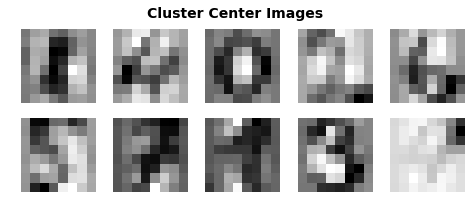

In [15]:
# Visualising the images that make up the cluster centers


# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [16]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape


[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

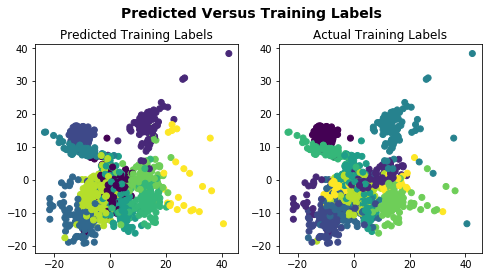

In [17]:
# Visualising the predicted labels vs the training targets

# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')
# Show the plots
plt.show()

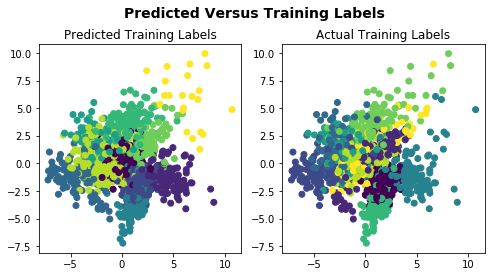

In [18]:
# Using the PCA reduction method to visualise results from another perspective

# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

* PCA results appear to be more accurate. However this can be further analysed
### Evaluation of the Clustering Model

* We use a confusion Matrix to evaluate the Model
* The homogeneity score tells you to what extent all of the clusters contain only data points which are members of a single class.
* The completeness score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster.
* The V-measure score is the harmonic mean between homogeneity and completeness.
* The adjusted Rand score measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
* The Adjusted Mutual Info (AMI) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.
* The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores ranges from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse mached to neighboring clusters. If many points have a high value, the clusteirng configuration is good.

In [19]:
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Print out the confusion matrix with `confusion_matrix()`
print(confusion_matrix(y_test, y_pred))
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]
inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


## Support Vector Machines (SVM)


In [20]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
images_test.shape

(450, 8, 8)

In [22]:
# Finding the best parameters using grid search and cross validation

# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.991833704528582
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


In [23]:
# Applying the best parameters to the data

# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.9933333333333333

In [24]:
# Predicting the value of the test set and comparing results

# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 5 3 6 2 1 6 2
 1 7 5 5 1 9]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 

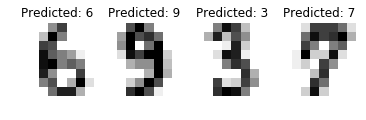

In [25]:
# visualising the predicted together with the actual

# Import matplotlib
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)
svc_modelr = svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train)

# Assign the predicted values to `predicted`
predicted = svc_modelr.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

In [26]:
# Testing how the model performs

# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted ))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      1.00      1.00        37
          2       1.00      1.00      1.00        38
          3       1.00      0.96      0.98        46
          4       1.00      1.00      1.00        55
          5       0.97      0.98      0.97        59
          6       0.98      0.98      0.98        45
          7       1.00      0.98      0.99        41
          8       0.95      0.97      0.96        38
          9       0.96      0.96      0.96        48

avg / total       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 1  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  0  0  1  0  0  1 46]]


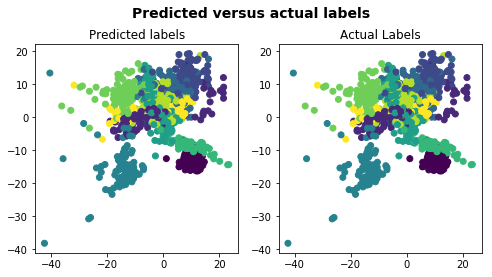

In [27]:
# Visualising the performance of the model

# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_modelr.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

## Results in a dataframe

In [29]:
import pandas as pd
data_ = pd.DataFrame(digits.data)
data_["Target"] = digits.target
data_.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [66]:
# Spliting the data
from sklearn.model_selection import train_test_split
# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data_.iloc[:,0:64], data_.Target, digits.images, test_size=0.25, random_state=42)

In [67]:
# Creating a dataframe of the training data
traindata = pd.DataFrame(X_train)
traindata["y_train"] = y_train
traindata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y_train
678,0.0,0.0,2.0,15.0,15.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.0,7.0,0.0,0.0,0.0,5
1469,0.0,5.0,16.0,15.0,3.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,5.0,16.0,14.0,8.0,6.0,1.0,0.0,2
266,0.0,0.0,4.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,15.0,11.0,2.0,0.0,0.0,0


In [68]:
# Creating a dataframe of the testing data
testdata = pd.DataFrame(X_test)
testdata["y_test"] = y_test
testdata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y_test
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0,6
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0,9
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0,3


In [69]:
# Predicting the target results using KMeans

# Create the KMeans model
clf_k = KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data `X_train`to the model
clf_k.fit(X_train)

pred_k = clf_k.predict(X_test)


In [70]:
# Adding the KMeans predicted results to the test dataframe
# This helps with comparing what should be the results (y_test) with what the model predicted (KMeans_ prediction)
ntestdata=testdata.copy()
ntestdata["KMeans_Prediction"] = pred_k
ntestdata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,y_test,KMeans_Prediction
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0,6,4
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0,9,3
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0,3,2


In [145]:
# From the results above, it is clear that KMeans_prediction is not accurate as the results are not the same.
# Here is a confusion Matrix to help us understand the performance of the KMeans model

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, pred_k ))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test, pred_k))

#accuracy score
print("Accuracy score is {0:.3f}%".format(metrics.accuracy_score(y_test,pred_k)*100))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        43
          1       0.00      0.00      0.00        37
          2       0.05      0.05      0.05        38
          3       0.04      0.07      0.05        46
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        59
          6       0.02      0.02      0.02        45
          7       0.00      0.00      0.00        41
          8       0.02      0.03      0.02        38
          9       0.04      0.04      0.04        48

avg / total       0.02      0.02      0.02       450

[[ 0  0  0  0  0  0 43  0  0  0]
 [10  0  0  0  0 20  0  7  0  0]
 [ 0  0  2  0  0  3  0 33  0  0]
 [ 0  0 40  3  0  2  0  0  1  0]
 [ 1 51  0  0  0  1  0  0  2  0]
 [ 0  0  0 16  1  0  0  0  0 42]
 [ 0  0  0  0 44  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 41  0]
 [ 0  0  1 13  0 21  0  0  1  2]
 [ 3  0  1 39  0  0  0  0  3  2]]
Accuracy score is 2.000%


In [114]:
# From the Confusion Matrix, the Accuracy of the KMeans model is about 86%
# This can be improved using other methods. 
# Next I use SVM to check if I will get better results with it
# Optimisin SVM Parameters
# This can be done using Gridsearch or cross validation

from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid_search = GridSearchCV(svm.SVC(), param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', grid_search.best_score_)
print('Best `C`:',grid_search.best_estimator_.C)
print('Best kernel:',grid_search.best_estimator_.kernel)
print('Best `gamma`:',grid_search.best_estimator_.gamma)


Best score for training data: 0.977728285077951
Best `C`: 1
Best kernel: linear
Best `gamma`: auto


In [115]:
# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9910913140311804
Best `C`: 1
Best kernel: rbf
Best `gamma`: 0.001


In [116]:
svc_modelr = svm.SVC(C=1, kernel='rbf', gamma=0.001).fit(X_train, y_train)

# Assign the predicted values to `predicted`
predicted = svc_modelr.predict(X_test)

In [118]:
ntestdata["SVM_Predicted"] = predicted
ntestdata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,y_test,KMeans_Prediction,SVM_Predicted
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,14.0,14.0,5.0,0.0,6,4,6
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,13.0,16.0,11.0,1.0,0.0,0.0,9,3,9
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,0.0,13.0,16.0,15.0,8.0,0.0,0.0,3,2,3


In [144]:
from sklearn import metrics
# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted ))

# Print the confusion matrix of `y_test` and `predicted`
print(metrics.confusion_matrix(y_test, predicted))

#accuracy score
print("Accuracy score is {0:.3f}%".format(metrics.accuracy_score(y_test,predicted)*100))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        37
          2       0.97      1.00      0.99        38
          3       1.00      0.96      0.98        46
          4       1.00      1.00      1.00        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       0.98      0.98      0.98        41
          8       1.00      1.00      1.00        38
          9       0.98      0.98      0.98        48

avg / total       0.99      0.99      0.99       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0  1  0 47]]
Accuracy score is 99.111%


In [124]:
# The SVM model was 99% accurate whereas the KMeans model was only 0.2% accurate

## Pipeline

* For the pipeline classifiers we shall use:
    * LogisticRegression
    * Support Vector Machines - linear and rbf
    * K-nearest Classifier
    * Decision Tree Classifier
    * Random Forest Classifier
    * Gradient Bossting Classifier

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans

pipeline = Pipeline([('normalizer', StandardScaler()), # Step 1 - Normalise the data
                     ('clf', LogisticRegression(C=1, max_iter=100)) # Step 2 - Classifier
                    ])

In [130]:
scores = cross_validate(pipeline, X_train, y_train)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.44878006, 0.14991832, 0.13692904]),
 'score_time': array([0.02696991, 0.0010004 , 0.00101352]),
 'test_score': array([0.9579646 , 0.97767857, 0.98210291]),
 'train_score': array([0.99664804, 0.99777531, 0.99777778])}

In [138]:
print("The average score of the Logistic Regression is: {0:.3f}%".format(scores['test_score'].mean()*100))

The average score of the Logistic Regression is: 97.258%


In [147]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
clfs.append(KMeans())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.14293360710144043
fit_time  std  0.006469823246532781
score_time  mean  0.0010004838307698567
score_time  std  1.0707327393277035e-05
test_score  mean  0.9725820271586292
test_score  std  0.010492712800924725
train_score  mean  0.9974003761219848
train_score  std  0.00053197961247008
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.059641758600870766
fit_time  std  0.0028735194238